#   **Project 1: Time Series Analysis**

### Juan Camilo Marin Cala - 201412568
### Hector Fabian Rodriguez Mayorga - 201921382
### Julian Andres Velasquez Osorio - 201014210
### Sergio Ardila Rodríguez - 201924139

## **Description** 
The current Time Series Analysis uses as database the list of accidents occurred in 2010 in Colombia collected by the national government. For this project, it is of special interest to analyze the behavior of the number of accidents that occurred in the main 5 Colombia cities, observing it for weeks and analyzing each of the days that it is composed of, looking for a recurrent temporary component in any of the cities in terms of accidents.

### **The Question of Interest is: What behavior will have the accidents in the five most Colombia representative cities in 2011?**

This exercise is of great interest since it is possible to determine the days of greatest or least accidents in a week, trying to find an incidence of the influx of vehicles on a weekday or a weekend day. Investigating the dynamics of road accidents could be valuable information for district administrations in terms of road planning and vehicle management policies, as well as allowing specific measures to be taken to decrease the accident rate if the analysis find the reasons for possible temporalities that affect accidents.

In [2]:
    import pandas as pd 
    import numpy as np 
    import datetime as dt
    import matplotlib.pyplot as plt
    import seaborn as sns


In [3]:
    pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [4]:
    pip install fbprophet 

Note: you may need to restart the kernel to use updated packages.


In [3]:
    from fbprophet import Prophet
    from fbprophet.plot import add_changepoints_to_plot

In [44]:
    df = pd.read_csv("Accidentes.csv")
    df.fillna(0)
    df.set_index( ["semana" , "dia_semana"], inplace=True)
    df.head()

BOGOTA  MEDELLIN  CALI  CARTAGENA  BARRANQUILLA
semana dia_semana                                                 
1      0             70.0      56.0  52.0       10.0           6.0
       1             79.0     103.0  72.0       16.0           6.0
       2            103.0     129.0  56.0       16.0          10.0
       3             85.0      86.0  78.0        1.0          16.0
       4             78.0      75.0  63.0       15.0          15.0

As can be seen, there is an apparently stationary time series of accidents in each of the cities with a clear difference in scale with respect to Bogotá, Medellín and Cali in comparison to Cartagena and Barranquilla. A greater number of accidents are observed in the year in Medellín, the  last series found above.

Text(0.5, 0, 'Week')

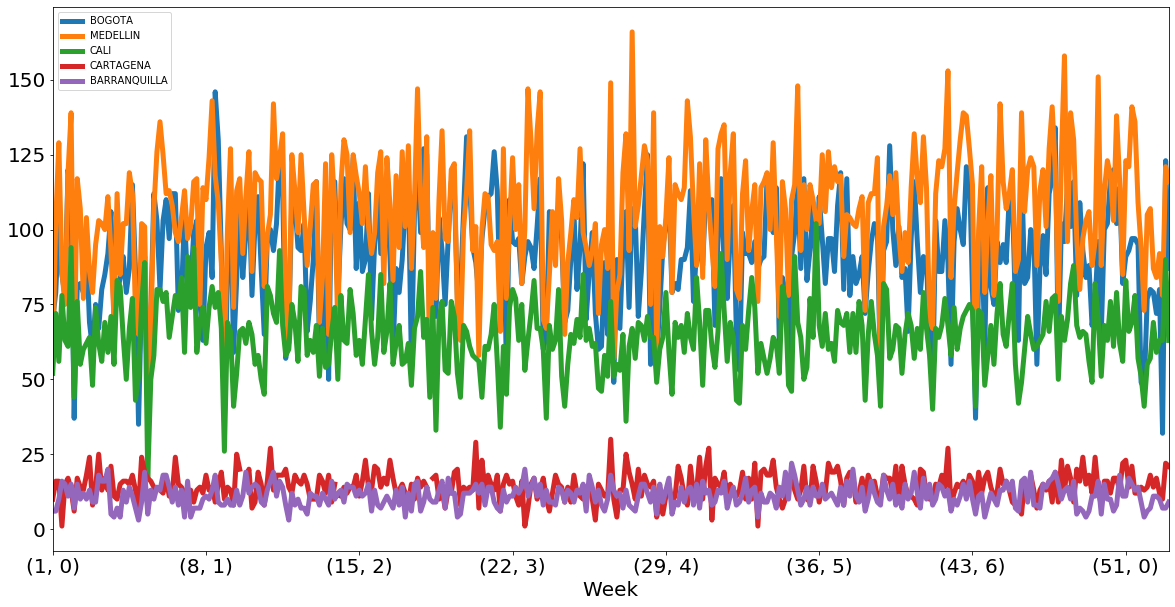

In [7]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Week', fontsize=20)

The moving average of a week is calculated seeking to identify the trend of each of the series of accidents. Behaviors are not the same for all cities. The largest urban centers in Colombia, Medellin and Bogotá present a greater fluctuation with more peaks and valleys than what we could find in the series of Caribbean cities.

Despite this apparent greater fluctuation, it is possible to determine peaks and falls in each of the series. In this case we observe falls at the beginning of the year in Bogotá, Medellin, and Cali, while in Cartagena it remains or even increases. As well as a significant drop in all series at the end of the year.

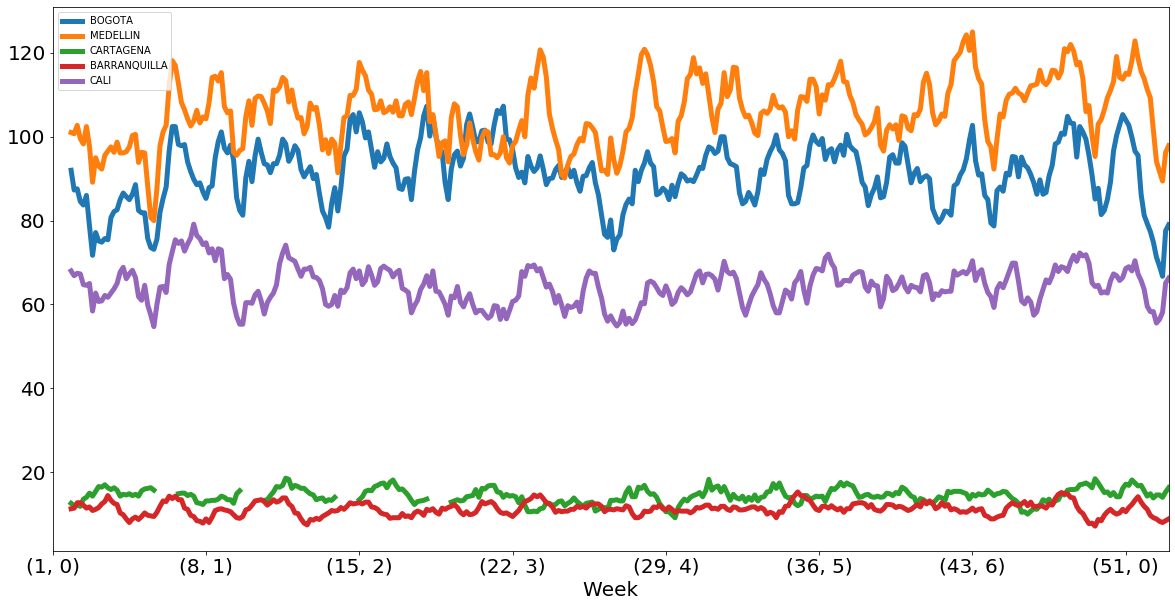

In [8]:
df[['BOGOTA', 'MEDELLIN' , 'CARTAGENA' , 'BARRANQUILLA' , 'CALI']].rolling(7).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Week', fontsize=20);

Dickey Fuller's test is performed to inquire the behavior of the seasonality of the series:

In [20]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['BOGOTA'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
    
result = adfuller(df['MEDELLIN'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))  
    
result = adfuller(df['CALI'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
result = adfuller(df['BARRANQUILLA'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    



ADF Statistic: -4.341802
p-value: 0.000376
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
ADF Statistic: -6.199324
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
ADF Statistic: -14.245349
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
ADF Statistic: -11.728270
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


As it was seen with the  plots, for each of the Cities (Bogota, Medellin, Cali, Cartagena, Barranquilla) the null hypothesis is rejected and it is confirmed that the series as they come are stationary, which facilitates their management as there is no need to make first order differentiations.

In [21]:
df.corr()

,BOGOTA,MEDELLIN,CALI,CARTAGENA,BARRANQUILLA
BOGOTA,1.000000,0.669902,0.478906,0.178925,0.347512
MEDELLIN,0.669902,1.000000,0.513450,0.229838,0.394588
CALI,0.478906,0.513450,1.000000,0.161516,0.297544
CARTAGENA,0.178925,0.229838,0.161516,1.000000,0.090413
BARRANQUILLA,0.347512,0.394588,0.297544,0.090413,1.000000


Analyzing the correlations of each of the series are analyzed to determine their similarity, it is observed that the correlations show the similarities that each city has with another. In this case, Bogotá and Medellín are the ones with the highest correlation as they have the largest number of people. Likewise, Cali has a much smaller magnitude of correlation with the main cities, with values of 0.47 and 0.51, respectively. On the other hand, a much more different accident dynamics is observed in the cities of the Caribbean, as is the case of Cartagena or Barranquilla, which has very low correlations with other cities in the study. Surprisingly, the correlation between the two cities of the Caribbean region is quite low, this phenomenon is probably since the dynamics of each city are different, one focused on tourism while the other with greater industrial activities.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

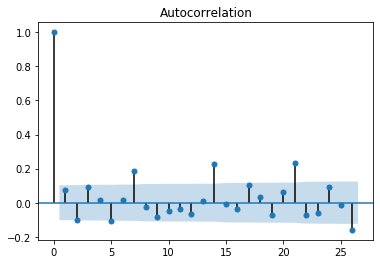

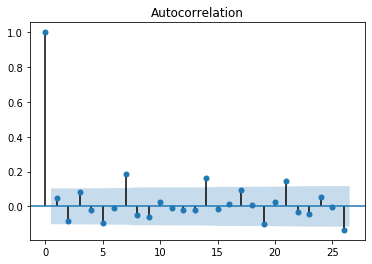

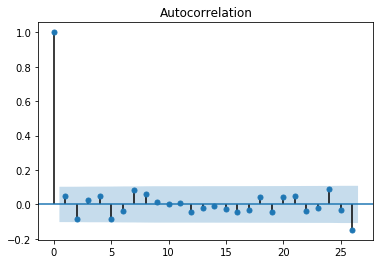

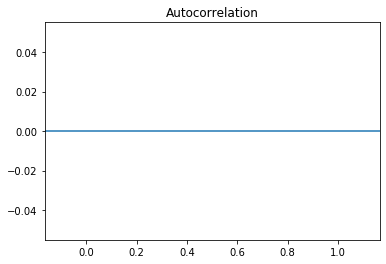

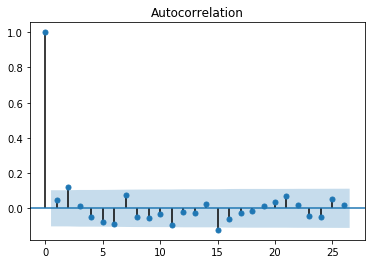

In [46]:
plot_acf(df.BOGOTA)
plot_acf(df.MEDELLIN)
plot_acf(df.CALI)
plot_acf(df.CARTAGENA)
plot_acf(df.BARRANQUILLA);

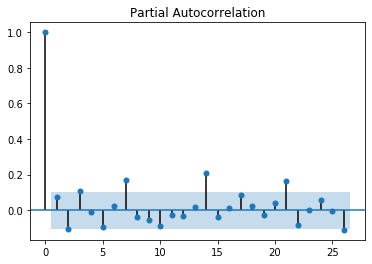

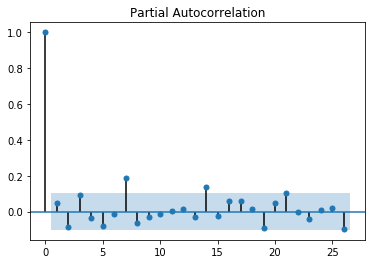

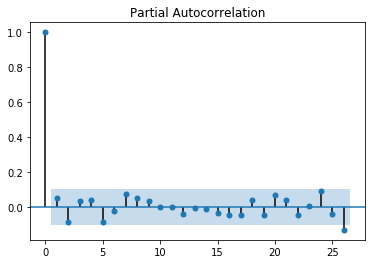

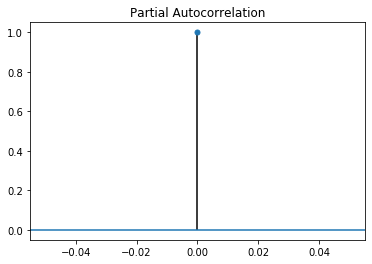

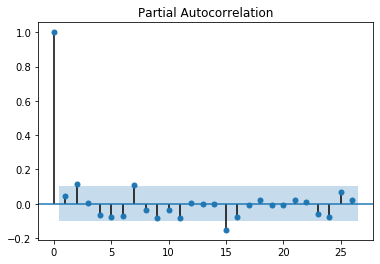

In [47]:
plot_pacf(df.BOGOTA)
plot_pacf(df.MEDELLIN)
plot_pacf(df.CALI)
plot_pacf(df.CARTAGENA)
plot_pacf(df.BARRANQUILLA);

Analyzing the autocorrelations and partial auto-correlations, we observe that in all the lag 0 is only significant for all the cities, this suggests that the series could be adjusted under a random walk model. As a first approximation to this theory, it will be a matter of fitting a persistence model to the series and analyze the result.

## **Random Walk Model**

Given the behavior of the data which was found through the correlations, we can be inclined to that the accidents has a random walk behavior because of which we can describe that the tomorrow’s value of a series is the value of today plus an unpredictable change (yt's trajectory follows random "steps").
In general, it can be established that the random walk is defined as:

#### yt = yt1 + ϵt where ϵt is i.i.d (white noise)

## *Autocorrelogram*
Autocorrelogram is observed to analyze if there is any recurrent component time on each of the days of the week. Once the graph is obtained, it is possible to determine how the autocorrelations, although they are of low magnitude, only those related to the 7-day lags have a significance, which weakly suggests that there is a temporary recurrence in the accident components.

If we observe the autocorrelations, neither Cartagena and Barranquilla present any significant lag.

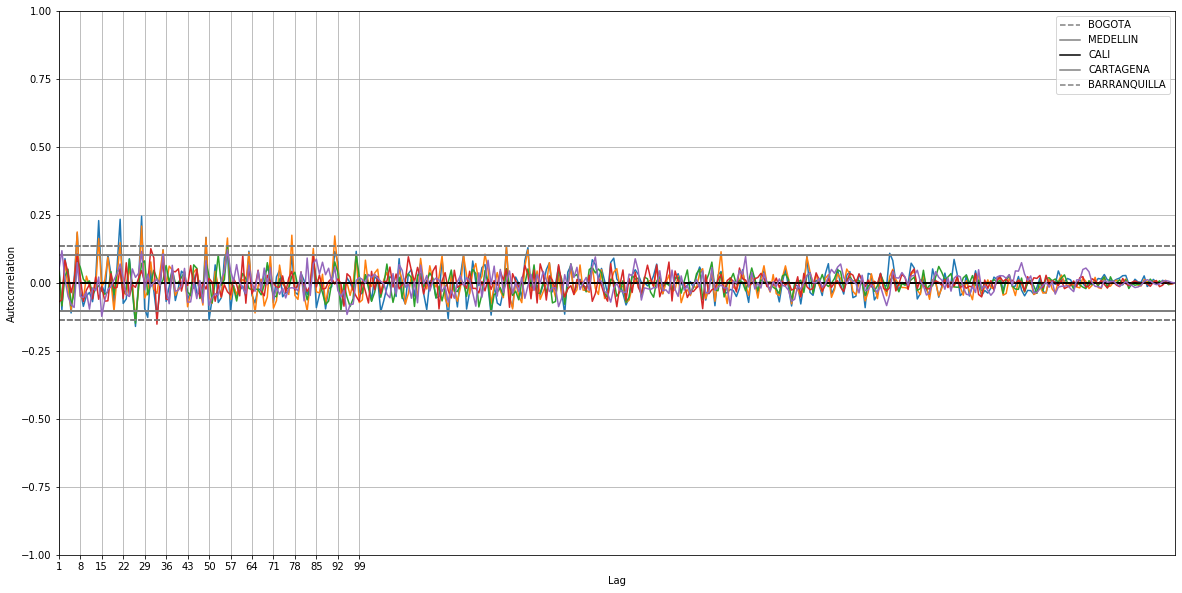

In [86]:
plt.figure(figsize=(20,10))
pd.plotting.autocorrelation_plot(df.BOGOTA)
pd.plotting.autocorrelation_plot(df.MEDELLIN)
pd.plotting.autocorrelation_plot(df.CALI)
pd.plotting.autocorrelation_plot(df.CARTAGENA)
pd.plotting.autocorrelation_plot(df.BARRANQUILLA)
plt.legend(["BOGOTA" , "MEDELLIN" , "CALI" , "CARTAGENA" , "BARRANQUILLA"])
plt.xticks(np.arange(1, 100, 7));


## *Accident Time Series Forecast*

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

As a result of what was observed with the autocorrelations, both graphs showed only significance at the zero lag, we tried to fit the series under a Radom walk model, to determine if the series is indeed predictable or not. In this way it is the first forecasting model explored.

In [54]:
df = df.fillna(0)

data_random = pd.DataFrame(columns= df.columns)
data_random = pd.DataFrame(pd.np.empty((365, 5)))
  
    
for i in range(1,len(df)+1):
        if (i == 1): 
            data_random.iloc[i-1,0] = df.iloc[1-1,0]
            data_random.iloc[i-1,1] = df.iloc[1-1,1]
            data_random.iloc[i-1,2] = df.iloc[1-1,2]
            data_random.iloc[i-1,3] = df.iloc[1-1,3]
            data_random.iloc[i-1,4] = df.iloc[1-1,4]
        else: 
            data_random.iloc[i-1,0] = df.iloc[i-2,0]  + np.random.normal(loc=0.0, scale=1.0, size=None)
            data_random.iloc[i-1,1] = df.iloc[i-2,1]  + np.random.normal(loc=0.0, scale=1.0, size=None)
            data_random.iloc[i-1,2] = df.iloc[i-2,2]+ np.random.normal(loc=0.0, scale=1.0, size=None)
            data_random.iloc[i-1,3] = df.iloc[i-2,3]+ np.random.normal(loc=0.0, scale=1.0, size=None)
            data_random.iloc[i-1,4] = df.iloc[i-2,4]+ np.random.normal(loc=0.0, scale=1.0, size=None)
     
        
    #calcular el test
from sklearn.metrics import mean_squared_error
errores_rw = list()
    
errores_rw.append(mean_squared_error(df.iloc[:,0], data_random.iloc[:,0]))
errores_rw.append(mean_squared_error(df.iloc[:,1], data_random.iloc[:,1]))
errores_rw.append(mean_squared_error(df.iloc[:,2], data_random.iloc[:,2]))
errores_rw.append(mean_squared_error(df.iloc[:,3], data_random.iloc[:,3]))
errores_rw.append(mean_squared_error(df.iloc[:,4], data_random.iloc[:,4]))

errores_rw

[698.3353263373987,
 847.0654021250014,
 268.19770327570393,
 53.259262860566515,
 27.187508219834843]

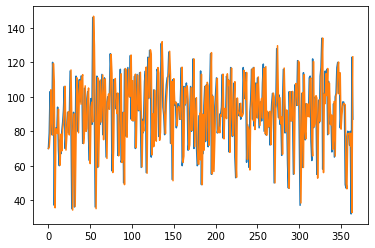

In [98]:
plt.plot( df.BOGOTA.values) 
plt.plot(data_random.iloc[:,0])

It is shown how the errors obtained from a random walk model are high, especially in Bogotá, Medellin and Cali. In smaller cities the error is less, however when finding errors of a high magnitude, it generates motivation to find models that can generate a better fit. If you look at the graph you see a good fit but with a big error, which could be improved by using an ARIMA model.

## *ARIMA Model*

As a second step, we will use an ARIMA model, in this case for computational capacity the ARIMA model will be tested (7,2,1). Where we try to consider the lags of up to 7 days, differentiated twice and with a moving average of 1, it was expected that there will be no effects that will be diluted from the previous day. We tested with a mobile forecast for each of the series of each city.

In [57]:
from statsmodels.tsa.arima_model import ARIMA
errores_arima = list()

for q in range(1, 5):
    series = df.iloc[:,q-1]       
    X = series.values
    size = int(len(X) * 0.85)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        try:
            	model = ARIMA(history, order=(7,2,1))
            	model_fit = model.fit(disp=0)
            	output = model_fit.forecast()
            	yhat = output[0]
            	predictions.append(yhat)
            	obs = test[t]
            	history.append(obs)
            	print('predicted=%f, expected=%f' % (yhat, obs))
        except:
            	model = ARIMA(history, order=(1,1,1))
            	model_fit = model.fit(disp=0)
            	output = model_fit.forecast()
            	yhat = output[0]
            	predictions.append(yhat)
            	obs = test[t]
            	history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    errores_arima.append(  mean_squared_error(test, predictions) ) 

errores_arima

predicted=107.797233, expected=116.000000
predicted=107.797233, expected=116.000000
predicted=99.376682, expected=107.000000
predicted=99.376682, expected=107.000000
predicted=110.196007, expected=112.000000
predicted=110.196007, expected=112.000000
predicted=111.792143, expected=120.000000
predicted=111.792143, expected=120.000000
predicted=103.265778, expected=86.000000
predicted=103.265778, expected=86.000000
predicted=104.158347, expected=90.000000
predicted=104.158347, expected=90.000000
predicted=116.619051, expected=139.000000
predicted=116.619051, expected=139.000000
predicted=113.262742, expected=106.000000
predicted=113.262742, expected=106.000000
predicted=105.419562, expected=120.000000
predicted=105.419562, expected=120.000000
predicted=116.443110, expected=124.000000
predicted=116.443110, expected=124.000000
predicted=114.159318, expected=121.000000
predicted=114.159318, expected=121.000000
predicted=107.655737, expected=88.000000
predicted=107.655737, expected=88.000000


/Users/juancamilo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=112.014638, expected=107.000000
predicted=112.014638, expected=107.000000
predicted=113.395672, expected=87.000000
predicted=113.395672, expected=87.000000
predicted=111.467044, expected=84.000000
predicted=111.467044, expected=84.000000
predicted=100.359771, expected=92.000000
predicted=100.359771, expected=92.000000
predicted=90.645435, expected=78.000000
predicted=90.645435, expected=78.000000
predicted=82.301808, expected=121.000000
predicted=82.301808, expected=121.000000
predicted=99.576881, expected=116.000000
predicted=99.576881, expected=116.000000
predicted=64.253526, expected=65.000000
predicted=62.732038, expected=61.000000
predicted=62.732038, expected=61.000000
predicted=63.842944, expected=72.000000
predicted=63.842944, expected=72.000000
predicted=64.035568, expected=82.000000
predicted=67.404070, expected=55.000000
predicted=67.404070, expected=55.000000
predicted=66.336276, expected=42.000000
predicted=66.336276, expected=42.000000
predicted=69.443595, expec

/Users/juancamilo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

overflow encountered in exp

/Users/juancamilo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

invalid value encountered in true_divide

/Users/juancamilo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

overflow encountered in exp

/Users/juancamilo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

invalid value encountered in true_divide



predicted=15.750991, expected=24.000000
predicted=15.750991, expected=24.000000
predicted=16.956249, expected=15.000000
predicted=16.956249, expected=15.000000
predicted=17.384407, expected=18.000000
predicted=17.384407, expected=18.000000
predicted=18.110835, expected=12.000000
predicted=18.110835, expected=12.000000
predicted=16.167426, expected=24.000000
predicted=16.167426, expected=24.000000
predicted=16.893553, expected=13.000000
predicted=16.893553, expected=13.000000
predicted=17.751422, expected=8.000000
predicted=17.751422, expected=8.000000
predicted=18.568391, expected=16.000000
predicted=18.568391, expected=16.000000
predicted=17.024408, expected=16.000000
predicted=17.024408, expected=16.000000
predicted=14.637620, expected=12.000000
predicted=14.637620, expected=12.000000
predicted=14.687087, expected=17.000000
predicted=14.687087, expected=17.000000
predicted=15.879129, expected=17.000000
predicted=15.879129, expected=17.000000
predicted=14.741694, expected=13.000000
pr

/Users/juancamilo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

overflow encountered in exp

/Users/juancamilo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

invalid value encountered in true_divide

/Users/juancamilo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

overflow encountered in exp

/Users/juancamilo/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

invalid value encountered in true_divide



predicted=9.075449, expected=11.000000
predicted=9.075449, expected=11.000000
predicted=8.454149, expected=16.000000
predicted=8.454149, expected=16.000000
predicted=9.729337, expected=5.000000
predicted=9.729337, expected=5.000000
predicted=9.234572, expected=15.000000
predicted=9.234572, expected=15.000000
predicted=8.087872, expected=10.000000
predicted=8.087872, expected=10.000000
predicted=9.353332, expected=10.000000
predicted=9.353332, expected=10.000000
predicted=10.390609, expected=6.000000
predicted=10.390609, expected=6.000000
predicted=10.125764, expected=8.000000
predicted=10.125764, expected=8.000000
predicted=9.807839, expected=18.000000
predicted=9.807839, expected=18.000000
predicted=9.564623, expected=11.000000
predicted=9.564623, expected=11.000000
predicted=12.590433, expected=11.000000
predicted=12.590433, expected=11.000000
predicted=11.841143, expected=17.000000
predicted=11.841143, expected=17.000000
predicted=11.697895, expected=15.000000
predicted=11.697895, e

[389.78529986277425, 130.1813385857933, 24.75428499331279, 18.731356182812068]

In [100]:
print(pd.DataFrame(errores_arima))

            0
0  389.785300
1  130.181339
2   24.754285
3   18.731356


Se evidencia que medidante el uso del modelo ARIMA se consigue un mejor resultado en terminos de error, reduciendo el desfase de pronostico de accidentes en las ciudades grandes y de igual manera en ciudades pequeñas volviendolo aun menor.De esta manera se determina que el modelo si puede pronsoticarse mediante un modelo ARIMA, al mostrar un mejor desempeño que una caminata aleatoria. 

## *Uso de la libreria Prophet para pronosticar la serie de tiempo*
Por ultimo, se utiliza la libreria de prophet para mejorar el ajuste de los modelos. De igual manera se utilizará un pronostico movil, buscando incorporar la historia mas reciente en cada pronostico de accidemntes.

In [101]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

base = dt.datetime(2010, 1, 1)
date_list =  pd.date_range(base, periods=365).tolist()   
        
serie_profet = df.iloc[:,0]  
serie_profet = serie_profet.reset_index()

In [ ]:
errores_profet = list()  
    
for q in range(1, 5 ):
    
        serie_profet = df.iloc[:,q-1]  
        serie_profet = serie_profet.reset_index()
        serie_profet = pd.concat( [  pd.Series(date_list) , serie_profet]  , axis = 1   )
        serie_profet = serie_profet.iloc[:,[0,-1]]
        serie_profet.columns = ["ds", "y"]
    
        X = serie_profet
        size = int(len(X) * 0.85)
        train, test = X[0:size], X[size:len(X)]
        predictions = list()

        for t in range(len(test)):
            model = Prophet()
            model.fit(train)
            future =  model.make_future_dataframe(periods=1, freq='d')
            output =  model.predict(future)
            yhat = output["yhat"].iloc[-1]
            predictions.append(yhat)
            obs = pd.DataFrame(test.iloc[t,:]).transpose()
            train = train.append(obs)
            print('predicted=%f, expected=%f' % ((yhat), obs.iloc[0,1]))
        errores_profet.append(  mean_squared_error(test.iloc[:,1], predictions) ) 


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/juancamilo/opt/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=94.224735, expected=95.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=88.580248, expected=89.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=97.100375, expected=111.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=102.962824, expected=112.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=75.355854, expected=74.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=86.301318, expected=63.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=92.906633, expected=122.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=94.706128, expected=82.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=89.069628, expected=84.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=97.639622, expected=100.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=103.071756, expected=98.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=74.744057, expected=55.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=85.042446, expected=87.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=92.713667, expected=98.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=93.718347, expected=85.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=88.464128, expected=112.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=97.802932, expected=117.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=103.319250, expected=134.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=75.243826, expected=58.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=86.503581, expected=102.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=93.535995, expected=96.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=94.466005, expected=115.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=90.255573, expected=101.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=98.999375, expected=116.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=105.215702, expected=78.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=75.423360, expected=109.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=87.214973, expected=93.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=94.427486, expected=84.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=95.695397, expected=88.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=90.600863, expected=68.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=99.954505, expected=76.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=104.292274, expected=96.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=75.340097, expected=65.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=86.862826, expected=100.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=93.406283, expected=102.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=94.818083, expected=117.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=90.056623, expected=120.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=99.496975, expected=102.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=104.273168, expected=114.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=76.197736, expected=82.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=87.802685, expected=91.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=94.599697, expected=93.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=96.199256, expected=97.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=91.068653, expected=97.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=99.441733, expected=95.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=104.797295, expected=49.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=76.310916, expected=47.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=87.384636, expected=77.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=94.049738, expected=80.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=95.325039, expected=79.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=90.324260, expected=72.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=98.400649, expected=80.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=102.277048, expected=32.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=73.950256, expected=123.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=85.885549, expected=87.000000


/Users/juancamilo/opt/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=114.763700, expected=116.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=107.634756, expected=107.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=114.613143, expected=112.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=117.994417, expected=120.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=90.697499, expected=86.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=106.911001, expected=90.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=113.376793, expected=139.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=114.935239, expected=106.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=107.652240, expected=120.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=114.525072, expected=124.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=118.277492, expected=121.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=90.722944, expected=88.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=106.814966, expected=113.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=114.463308, expected=120.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=115.252773, expected=101.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=108.192185, expected=127.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=115.425685, expected=141.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=118.697283, expected=120.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=91.673880, expected=76.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=107.723053, expected=124.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=115.038288, expected=158.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=115.974379, expected=96.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=109.519277, expected=139.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=116.725412, expected=130.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=119.656664, expected=97.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=91.752043, expected=80.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=108.515268, expected=97.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=116.295496, expected=103.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=115.221914, expected=106.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=110.224195, expected=88.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=116.663864, expected=96.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=118.465853, expected=151.000000


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=91.276363, expected=88.000000


In [110]:
print(errores_profet)

[23.429576911725757]


## *Prophet Analysis Component*

After the revision of the errors, it could be concluded that by using the prophet library the best performance is achieved when making the forecast, the details of the behavior of the model components and their structure for each one are entered Serie.

## *BOGOTA*
Analyzing in detail the behavior in the city of Bogotá in terms of accident rates, a peak is observed in 2010 in June, to subsequently start a fall for the rest of the year. If we look at the seasonality, it can be seen how Wednesday is the day with the highest peak in terms of accidents, followed by Thursday, where fewer accidents are reported during the week.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/juancamilo/opt/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



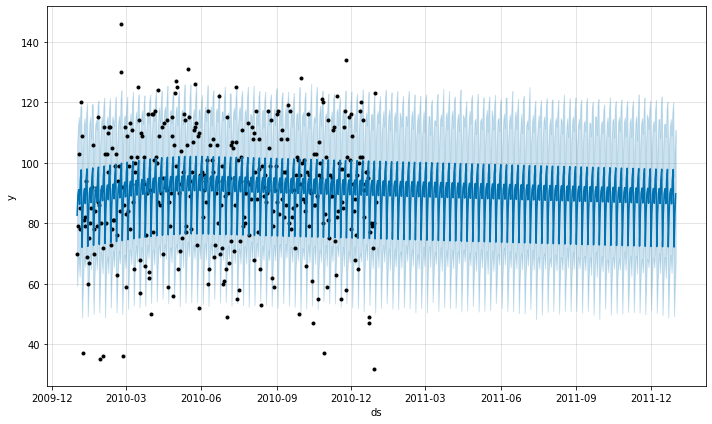

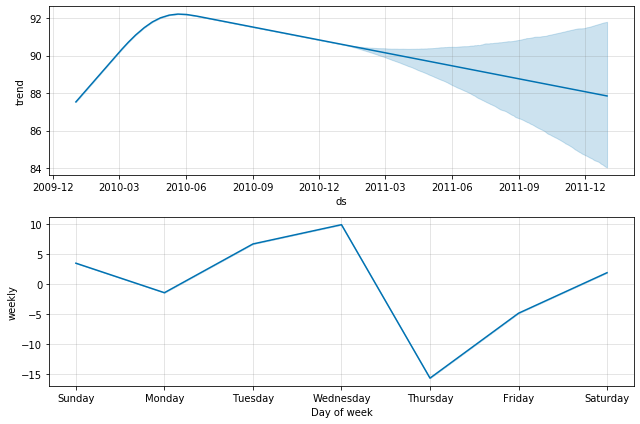

In [103]:
    serie_profet = pd.concat( [  pd.Series(date_list) , pd.Series( df.BOGOTA.values)]  , axis = 1   )
    serie_profet.columns = ["ds", "y"]
    model = Prophet()
    model.fit(serie_profet)
    future = model.make_future_dataframe(periods=365, freq='d')
    output =  model.predict(future)
    model.plot(output);
    model.plot_components(output);

## *MEDELLIN*

The behavior in the city of Medellin shows an important difference with respect to Bogotá´s, where it was a behavior that touched a peak and then fell; In the case of Medellin, accidents in that year were increasing with a clear trend and it is observed how the model includes this drift when generating the forecast.

Regarding the seasonal behavior of the days of the week, the dynamics if it resembles Bogotá with a peak on Wednesday and the most important fall on Thursday, however the great difference is how the other days remain at levels similar to Wednesday , which is due to this increase in accidents this year and which forces the seasonality components to contribute positively in a greater magnitude.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


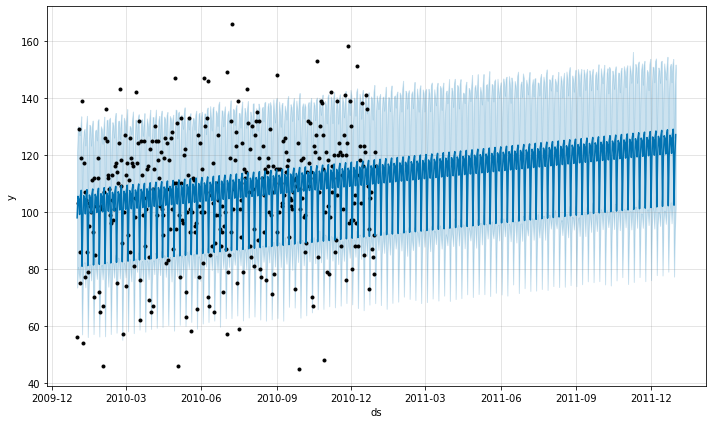

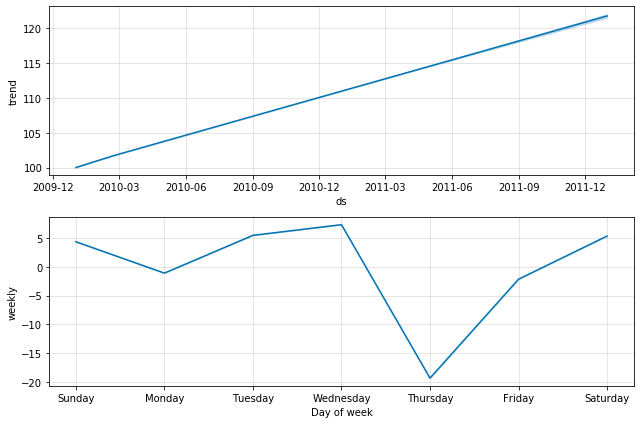

In [104]:
    serie_profet = pd.concat( [  pd.Series(date_list) , pd.Series( df.MEDELLIN.values)]  , axis = 1   )
    serie_profet.columns = ["ds", "y"]
    model = Prophet()
    model.fit(serie_profet)
    future = model.make_future_dataframe(periods=365, freq='d')
    output =  model.predict(future)
    model.plot(output);
    model.plot_components(output);

## *CALI*
In Cali, the dynamics is slightly different from what is observed in the other two cities analyzed. With a trend component showing a rebound in accidents after half the year, after a first semester, with a negative trend. Unlike what happens in other cities, the day in Cali in which the peak of accidents occurs is Tuesday, the minimum being played in the same way on Thursday. In this case, the next to present the greatest contribution are weekends, Saturdays and Sundays with the highest accident rate.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


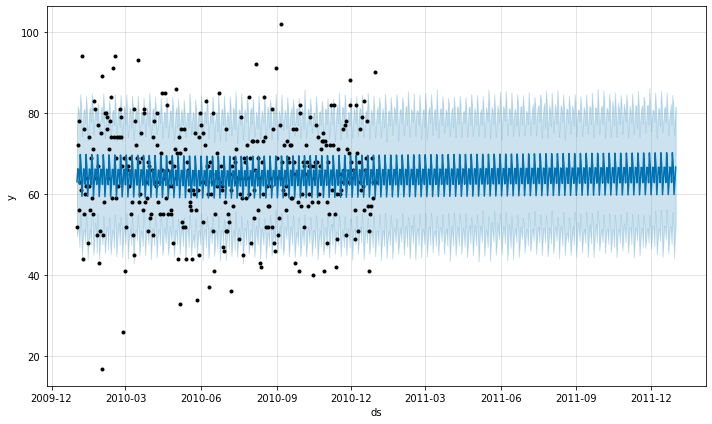

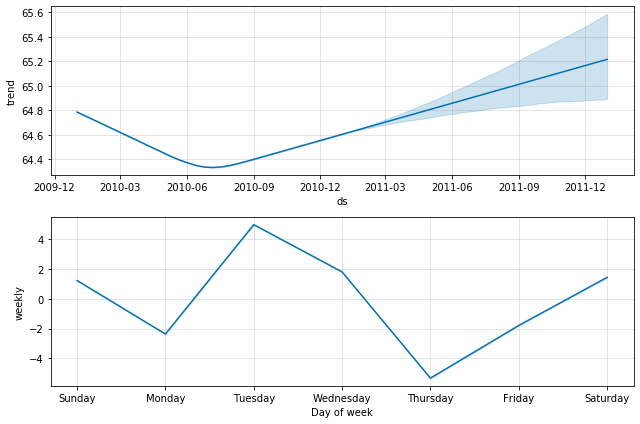

In [105]:
    serie_profet = pd.concat( [  pd.Series(date_list) , pd.Series( df.CALI.values)]  , axis = 1   )
    serie_profet.columns = ["ds", "y"]
    model = Prophet()
    model.fit(serie_profet)
    future = model.make_future_dataframe(periods=365, freq='d')
    output =  model.predict(future)
    model.plot(output);
    model.plot_components(output);

## *CARTAGENA*

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


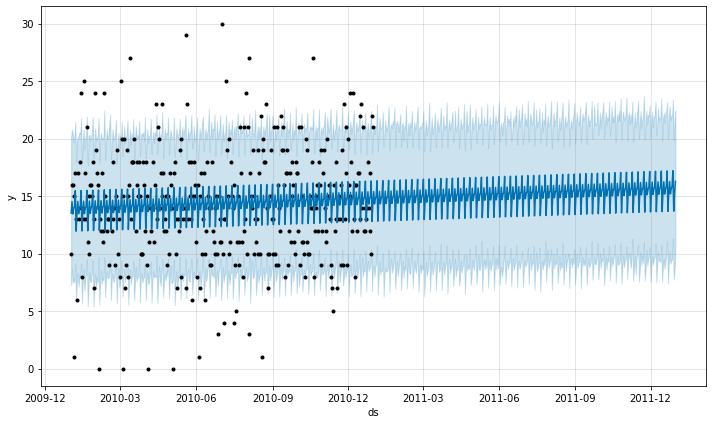

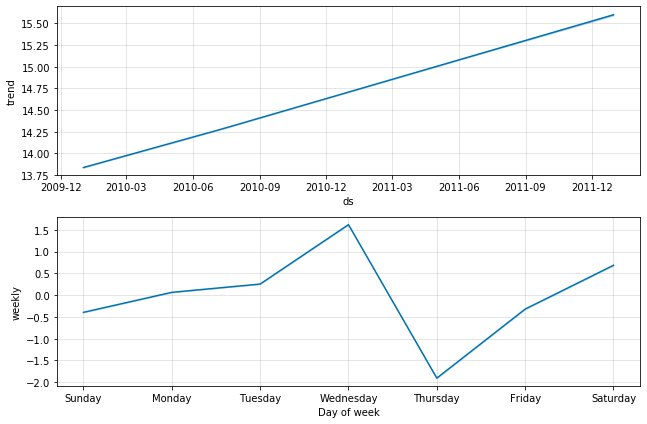

In [106]:
    serie_profet = pd.concat( [  pd.Series(date_list) , pd.Series( df.CARTAGENA.values)]  , axis = 1   )
    serie_profet.columns = ["ds", "y"]
    model = Prophet()
    model.fit(serie_profet)
    future = model.make_future_dataframe(periods=365, freq='d')
    output =  model.predict(future)
    model.plot(output);
    model.plot_components(output);

## *BARRANQUILLA*
Barranquilla shows a dynamic in terms of accidents with a positive trend according to the model, which is stable throughout the year without major change. Likewise, if seasonality is analyzed per day, a peak is identified on Sunday days where the highest occurs.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


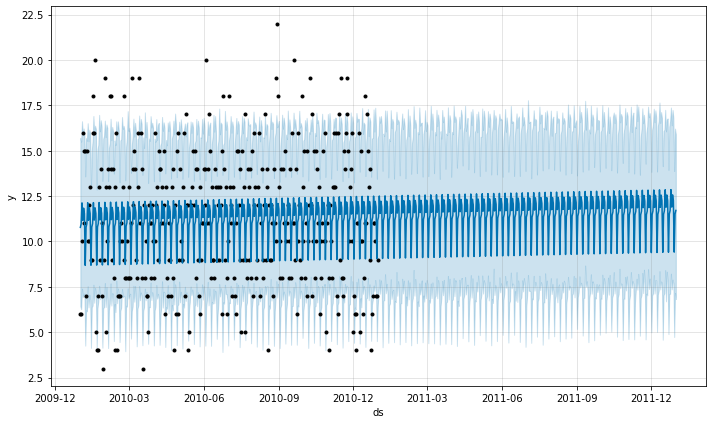

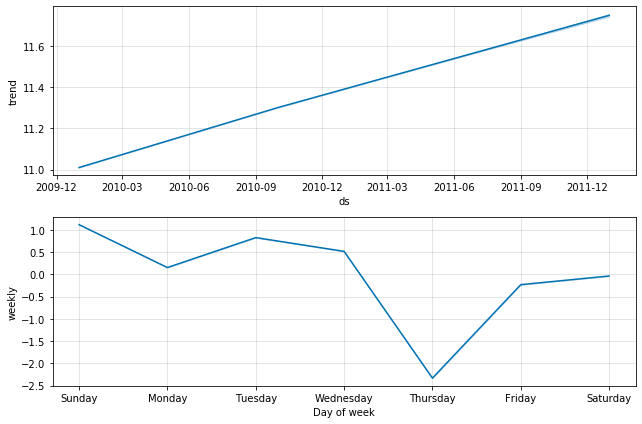

In [107]:
    serie_profet = pd.concat( [  pd.Series(date_list) , pd.Series( df.BARRANQUILLA.values)]  , axis = 1   )
    serie_profet.columns = ["ds", "y"]
    model = Prophet()
    model.fit(serie_profet)
    future = model.make_future_dataframe(periods=365, freq='d')
    output =  model.predict(future)
    model.plot(output);
    model.plot_components(output);

# Conclusions

# *2011 Forecast*

With the objective to forecast the behavior of the number of traffic accidents for the main cities of Colombia, in general it can be found that for four of five cities there is an upward trend. As a road and transit strategy, greater control is suggested in the cities of Medellín, Cali, Cartagena and Barranquilla.

As trends are being observed, it is found that Bogotá expects a downward trend in terms of accidents. For the analysis of this city it can be understood that the controls that are being carried out predict this decrease, so the data that is currently available, provides a part of tranquility in the current strategies.


# *Weekly Behavior*

A common behavior in the cities of Bogotá, Medellin and Cartagena is that the peak of accidents occurs on Wednesdays, while in the cities of Cali the highest accident rate is found on Wednesdays and for Barranquilla on days Sunday, identifying traffic behaviors in the metropolitan area for each city. For all the cities of the study, on Thursdays there is a decrease in accidents, it could probably show a lower circulation of vehicles in these main cities, so that this behavior occurs. When reviewing the analysis at the week level, it is found that after the fall in accidents on Thursday, there is an increase in it on Fridays and Saturdays; the peak of this number of accidents, becomes noticeable in the city of Barranquilla on Sunday, in which its maximum value is shown on these days.
